### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.enable_eager_execution

<function tensorflow.python.framework.ops.enable_eager_execution>

In [3]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainX[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

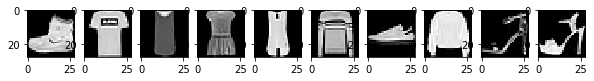

In [9]:
#Lets print the image as well
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
for i in range(1, 11,1):
  fig.add_subplot(1, 10, i)
  plt.imshow(trainX[i-1],cmap='gray')
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [10]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 5us/sample - loss: 243.8430 - acc: 0.0538 - val_loss: 4236.4482 - val_acc: 0.2033
Epoch 2/10
60000/60000 [==============================] - 0s 4us/sample - loss: 4227.7217 - acc: 0.2084 - val_loss: 9876.5684 - val_acc: 0.1811
Epoch 3/10
60000/60000 [==============================] - 0s 4us/sample - loss: 9811.1318 - acc: 0.1815 - val_loss: 14353.8301 - val_acc: 0.2391
Epoch 4/10
60000/60000 [==============================] - 0s 4us/sample - loss: 14240.5566 - acc: 0.2439 - val_loss: 18444.3574 - val_acc: 0.2859
Epoch 5/10
60000/60000 [==============================] - 0s 4us/sample - loss: 18374.1191 - acc: 0.2892 - val_loss: 14153.8594 - val_acc: 0.2687
Epoch 6/10
60000/60000 [==============================] - 0s 4us/sample - loss: 14100.5762 - acc: 0.2694 - val_loss: 13631.3184 - val_acc: 0.2873
Epoch 7/10
60000/60000 [==============================] - 0s 4us/sample - loss: 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
Total params: 7,890
Trainable params: 7,870
Non-trainable params: 20
_________________________________________________________________


### Execute the model

In [16]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=101)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 10.7585 - acc: 0.5420 - val_loss: 11.8194 - val_acc: 0.5461
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 10.4463 - acc: 0.5122 - val_loss: 10.8523 - val_acc: 0.5129
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 10.5988 - acc: 0.5167 - val_loss: 10.8750 - val_acc: 0.5146
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 10.5141 - acc: 0.5179 - val_loss: 10.8604 - val_acc: 0.5132
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 10.4525 - acc: 0.5177 - val_loss: 10.7414 - val_acc: 0.5144
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 9.1059 - acc: 0.4001 - val_loss: 9.2502 - val_acc: 0.3137
Epoch 7/10
6

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#from keras import optimizers
sgd = tf.keras.optimizers.SGD(lr=0.0001)

#Comile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 10.9777 - acc: 0.5096 - val_loss: 11.7582 - val_acc: 0.5052
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 10.8813 - acc: 0.5096 - val_loss: 11.7582 - val_acc: 0.5052
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 11.0038 - acc: 0.5096 - val_loss: 11.7582 - val_acc: 0.5052
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 10.9183 - acc: 0.5096 - val_loss: 11.7582 - val_acc: 0.5052
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 11.0152 - acc: 0.5096 - val_loss: 11.7582 - val_acc: 0.5052
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 11.0431 - acc: 0.5096 - val_loss: 11.7582 - val_acc: 0.5052
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 11.0194 - acc: 0.5096 -

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#from keras import optimizers
sgd = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Run the model

In [23]:
model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 33us/sample - loss: 1.4244 - acc: 0.6310 - val_loss: 0.9896 - val_acc: 0.7026
Epoch 2/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.8201 - acc: 0.7405 - val_loss: 0.7396 - val_acc: 0.7460
Epoch 3/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.6861 - acc: 0.7695 - val_loss: 0.6773 - val_acc: 0.7650
Epoch 4/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.6403 - acc: 0.7785 - val_loss: 0.6767 - val_acc: 0.7683
Epoch 5/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.6194 - acc: 0.7872 - val_loss: 0.6211 - val_acc: 0.7859
Epoch 6/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6048 - acc: 0.7941 - val_loss: 0.6626 - val_acc: 0.7667
Epoch 7/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6055 - acc: 0.7901 - val_l

**Accuracy is ranging from 75% to 79%. Please suggest what further more can be done to get this accuracy to above 95%**